In [ ]:
%matplotlib inline

# 변형(Transform)

데이터가 항상 머신러닝 알고리즘의 학습에 필요한 최종 처리가 된 형태로 제공되지는 않는다. 학습에 적합하게
**변형(transform)**을 해야하는 경우가 많다.

`TorchVision` 데이터셋들은 데이터의 사전 처리를 지원하기 위해서 두 개의 매개변수 ``transform``과 ``target_transform``을 지원한다. ``transform``은 입력 피처(feature)에, ``target_transform``은 라벨(label)에 적용될 전처리 루틴이다.

아래의 예에서는 CIFAR-10 데이터셋을 사용한다. 
CIFAR-10 데이터셋은 60,000장의 32x32 컬러 이미지로 구성되며, 트레인 이미지는 50,000개, 테스트 이미지는 10,000개이다. 이미지는 다음과 같이 10개의 클래스로 분류되어 있다. 

```
airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck
```

CIFAR-10 데이터셋에서 이미지는 PIL Image 형식이며, 정답(label)은 0에서서 9사이의의 정수(integer)이다. 학습을 하려면 이미지는 정규화(normalize)된 텐서 형태로 변환해야하고, 라벨은 원-핫(one-hot)으로 부호화(encode)해야 할 수도 있다. 다음 예에서는 이러한 변형(transformation)을 하기 위해 `torchvision.transforms` 패키지가 제공하는 ``ToTensor``, `Resize`, `Normalize`, ``Lambda``와 같은 미리 정의된(pre-built) 변환 모듈을 사용한다.

In [ ]:
#6000개의 이미지 10개 클래스에 60000개의 32*32 컬러 이미지인 cifar10 데이터 세트 로드하고 전처리함
#데이터 세트는 50000개의 훈련 이미지와 10000개의 테스트 이미지로 분할됨.
import torch
from torchvision import datasets
import torchvision.transforms as transforms

#교육 데이터 세트 로드, 여러 데이터 확장 적용, 데이터 세트의 크기와 다양성을 늘림
train_ds = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    #compose 함수는 다음을 포함하여 여러 이미지 변환을 함께 연결하는데 사용
    transform = transforms.Compose([
                       #이미지 데이터를 0에서 255 사이의 값을 가진 numpy 배열에서 0~1 사이 값을 가진 pytorch 텐서로 변환
                       transforms.ToTensor(),
                       #이미지 크기를 36*36 픽셀로 조정
                       transforms.Resize((36,36)),
                       #이미지를 32*32픽셀 영역을 임의로 잘라서 과적합을 방지하고 훈련 데이터의 다양성 높임
                       transforms.RandomCrop((32, 32)),
                       #0.5의 확률로 이미지를 무작위로 가로로 뒤집음. 과적합을 방지하고 훈련 데이터 다양성 높임
                       transforms.RandomHorizontalFlip(),
                       #평균을 빼고 표준편차로 나누어 이미지 데이터를 정규화한다
                       #이렇게 하면 데이터의 평균이 0이고 표준편차가 1이 되어 모델의 성능을 향상시킴
                       transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]),
    #transform 매개변수는 클래스 레이블을 정수에서 원-핫 인코딩된 벡터로 변환하는데 사용
    #lamdba 함수는 각 레이블에 함수를 적용하는데 사용, 먼저 모양이 (10,)인 0의 텐서를 생성한 다음 레이블에 해당하는 인덱스의 요소를 1로 설정
    target_transform = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

#테스트 데이터 세트를 로드하고 유사한 전처리 단계를 적용하지만 데이터 증가는 없음
test_ds = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
        
    transform = transforms.Compose([
                       transforms.ToTensor(), 
                       transforms.Resize((32,32)),
                       transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) ]),
    target_transform = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)
#전반적으로 이 코드는 이미지 분류를 위한 딥러닝 모델을 교육하고 평가하는데 사용하기 위해 CIFAR10데이터 세트를 로드하고 사전 처리하는데 사용된다.

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
#다양한 이미지 변환을 사용하여 이미 전처리된 CIFAR10훈련 데이터 세트의 첫 번째 샘플을 검사하는데 사용
#첫 번째 샘플을 두 개의 변수에 할당한다. x:이미지 데이터 포함 y:해당 레이블 포함
X, y = train_ds[0]
#이미지 데이터에 대한 정보를 인쇄
#3개의 채널(빨강, 녹색, 파랑)과 32*32 픽셀 크기의 컬러이미지이므로 모양이 (3,32,32)의 이미지 데이터를 포함하는 텐서를 인쇄
print(X)
#텐서의 모양을 인쇄하여 채널이 3개이고 크기가 32*32픽셀임을 확인
print(X.shape)
#텐서의 기본 통계 인쇄, 이러한 통계는 데이터의 값 범위와 적절하게 정규화되었는지 여부 이해하는데 유용
print(X.mean(), X.std(), X.max(), X.min())

#레이블에 대한 정보를 인쇄
#이미지의 클래스를 나타내는 0~9 사이의 정수인 첫 번째 샘플에 대한 레이블 인쇄
print(y)
#레이블이 스칼라 값임을 의미하는 () 모양임을 확인
print(y.shape)
#전반적으로 이 코드는 이미지 텐서와 해당 레이블이 포함하는 CIFAR10 훈련 데이터 세트의 첫번째 사전 처리된 샘플 검사하는데 사용


tensor([[[ 0.1608,  0.1869,  0.2261,  ..., -0.0231, -0.1673, -0.3490],
         [-0.0092, -0.0211,  0.0010,  ..., -0.0383, -0.2047, -0.4373],
         [-0.1168, -0.0703, -0.0629,  ..., -0.0014, -0.1162, -0.3020],
         ...,
         [-0.0410,  0.4209,  0.5973,  ...,  0.0829,  0.0150,  0.0033],
         [-0.3028,  0.0842,  0.5094,  ...,  0.0354,  0.0049,  0.0571],
         [-0.5922, -0.3438,  0.2695,  ...,  0.0641,  0.0965,  0.1961]],

        [[-0.0275, -0.0209,  0.0200,  ..., -0.2514, -0.3725, -0.5020],
         [-0.2693, -0.2900, -0.2639,  ..., -0.3266, -0.4833, -0.6621],
         [-0.3969, -0.3523, -0.3355,  ..., -0.2944, -0.4107, -0.5695],
         ...,
         [-0.2797,  0.1803,  0.3523,  ..., -0.2725, -0.3436, -0.3671],
         [-0.5076, -0.1525,  0.2571,  ..., -0.3141, -0.3434, -0.2867],
         [-0.7373, -0.5575,  0.0307,  ..., -0.2647, -0.2194, -0.1020]],

        [[-0.1922, -0.1987, -0.1660,  ..., -0.4797, -0.5586, -0.6314],
         [-0.4928, -0.5320, -0.5106,  ..., -0

**Note:** 어떤 손실함수를 사용하느냐에 따라서 원-핫 인코딩을 하지 않아도 되는 경우도 있다. `Quick Start` 튜토리얼에서 사용한 `nn.CrossEntropyLoss()`는 원-핫 인코딩을 해주지 않아도 된다.

## `TorchVision`이 제공하는 미리 정의된 `transform` 기능들

`torchvision.transforms`은 이미지 데이터에 대한 다양한 변환 기능을 제공한다. 자세한 사항은 [여기](https://pytorch.org/vision/stable/transforms.html)를 참조하라. 자주 활용되는 변환으로는 다음과 같은 것들이 있다.

**`ToTensor()`**: [`ToTensor`](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor)는 PIL Image나 NumPy ``ndarray`` 를  ``FloatTensor`` 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 [0., 1.] 범위로
비례하여 조정(scale)한다.

**`Resize()`**: Resize()는 이미지를 지정된 크기로 resizing한다.

**`Normalize()`**: 픽셀값을 지정된 평균(mean)과 표준편차(std)로 표준화(standardization)한다.

**`RandomCrop()`과 `RandomHorizontalFlip()`**: 이미지의 일부를 랜덤 크롭(crop)하고, 또한한 랜덤하게게 수평적으로로 플립립(flip)한다다. 이런 방식으로 학습 데티어를 인위적으로 늘리는 것을 **데이터 첨가(Data Augmentation)**라고 부른다.  

`transforms.Compose`는 여러 변환들을 합성한 변환 파이프라인을 정의한다.


In [ ]:
transform = transforms.Compose([
                       transforms.ToTensor(), 
                       transforms.Resize((36,36)),
                       transforms.RandomCrop((32, 32)),
                       transforms.RandomHorizontalFlip(),
                       transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]),

#### Lambda 변형(Transform)

Lambda 변형은 사용자 정의 람다(lambda) 함수를 적용한다. 여기에서는 정수를 원-핫으로 부호화된 텐서로 바꾸는 함수를 정의한다.
이 함수는 먼저 (데이터셋 정답의 개수인) 크기 10짜리 영 텐서(zero tensor)를 만들고,
[`scatter_`](<https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html>)를 호출하여
주어진 정답 ``y``에 해당하는 인덱스에 ``value=1``을 할당한다.



In [ ]:
target_transform = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))

## **사례: 얼굴 포즈(facial pose) 데이터셋**

이하의 내용은 [링크](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)된 큐토리얼을 부분적으로 수정한 것이다.

In [ ]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image

[여기](https://download.pytorch.org/tutorial/faces.zip)에서 데이터셋을 다운로드하여 적절한 곳에 압축을 해제하여 저장한다. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_dir = '/content/drive/MyDrive/DeepLearning2023/chap01/datasets/faces'

데이터셋에는 다음과 같은 형식으로 얼굴 랜드마크 정보를 저장하는 하나의 주석(anotation) 파일 `face_landmarks.csv`이 포함되어 있다.

```
image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x, ... ,part_67_x,part_67_y
0805personali01.jpg,27,83,27,98, ... 84,134
1084239450_e76e00b7e7.jpg,70,236,71,257, ... ,128,312
```

주석 파일을 pandas의 데이터프레임으로 열어서 살펴보자.
파일의 첫 줄은 헤드라인(headline)이고, 다음 줄 부터 각 행은 하나의 이미지 파일명과 136개의 정수로 구성된다. 이 정수들은 이미지상에 68개의 랜드마크 포인트의 좌표를 나타낸다.

In [ ]:
landmarks_frame = pd.read_csv(data_dir + '/face_landmarks.csv')
landmarks_frame

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0805personali01.jpg,27,83,27,98,29,113,33,127,39,...,93,136,100,141,93,135,89,135,84,134
1,1084239450_e76e00b7e7.jpg,70,236,71,257,75,278,82,299,90,...,148,311,179,308,149,312,137,314,128,312
2,10comm-decarlo.jpg,66,114,65,128,67,142,68,156,72,...,128,162,136,167,127,166,121,165,116,164
3,110276240_bec305da91.jpg,42,140,45,161,51,180,61,200,73,...,144,197,180,189,147,204,136,208,125,209
4,1198_0_861.jpg,138,392,141,427,145,464,152,501,166,...,293,507,331,511,294,516,279,518,265,516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,matt-mathes.jpg,85,152,83,173,83,195,85,217,91,...,160,224,190,225,162,236,151,237,141,235
65,person-7.jpg,32,65,33,76,34,86,34,97,37,...,79,98,91,99,79,99,74,99,69,99
66,person.jpg,78,83,79,93,80,103,81,112,85,...,119,115,132,114,120,121,114,122,109,121
67,person_TjahjonoDGondhowiardjo.jpg,41,92,41,103,43,114,44,125,48,...,85,130,94,130,85,128,81,128,77,128


다음은 66번 행을 자세히 살표보기 위한 코드이다.

In [ ]:
#데이터 세트의 특정 이미지에 대한 랜드마크 좌표 추출 및 표시하는데 사용
#데이터 세트는 landmarks_frame이라는 pandas 데이터 프레임에 저장되는것으로 가정
#각 행에는 이미지의 파일 이름과 해당 랜드마크 좌표가 일련의 (x,y) 쌍으로 포함된다.
#인덱스 n을 사용하여 데이터 프레임의 특정 행을 선택
n = 66
#iloc 방법은 정수 위치로 행과 열을 선택하는데 사용
#선택한 행의 첫 번째 열에 있는 값 엑세스하여 선택한 이미지의 파일 이름 추출
img_name = landmarks_frame.iloc[n, 0]
#선택한 행의 나머지 열에 있는 값을 엑세스하여 선택한 이미지의 랜드마크 좌표 추출, iloc 매서드는 첫번째를 제외한 모든 열을 선택하는데 사용
landmarks = landmarks_frame.iloc[n, 1:]
#랜드마크 좌표를 numpy 배열로 반환, 2차원 갖도록 재구성, 각 행은 랜드마크를 나타내고 각 열은 (x,y)쌍을 나타냄
landmarks = np.asarray(landmarks)

#따라서 landmarks는 이 코드 실행 후, (랜드마크 수, 2) 크기의 numpy 배열로 재구성
#reshape(-1, 2) 해당 차원의 크기를 자동적으로 계싼해주는 매개변수
landmarks = landmarks.astype('float').reshape(-1, 2)
#선택한 이미지와 해당 랜드마크에 대한 정보를 인쇄
print('Image name: {}'.format(img_name))
#이미지에 얼마나 많은 랜드마크가 있는지 나타내는 랜드마크 배열의 모양 인쇄
print('Landmarks shape: {}'.format(landmarks.shape))
#이미지에서 처음 4개의 랜드마크 좌표를 인쇄, 랜드마크를 시각적으로 검사하고 올바르게 추출되는지 확인가능
print('First 4 Landmarks: {}'.format(landmarks[:4]))
#전반적으로 이 코드는 pandas 데이터 프레임에 저장된 데이터 세트에서 특정 이미지의 랜드마크 좌표를 추출하고 표시하는데 사용

Image name: person.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 78.  83.]
 [ 79.  93.]
 [ 80. 103.]
 [ 81. 112.]]


이미지 위에 랜프마크 점들을 표시하여 디스플레이해보자.

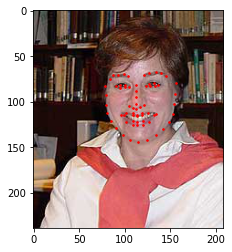

In [ ]:
# 연관된 랜드마크 좌표가 우에 겹쳐진 이미지를 표시하는데 사용되는 show)landmarks 함수 정의
#두 가지 인수 사용
#Image: 표시할 이미지, PIL Image 개체로 간주
#Landmark:이미지를 오버레이할 랜드마크 좌표, 모양이 (n_lanmarks,2)인 numpy 배열로 가정, 각 행은 랜드마크를 나타내고 각 열은 (x,y)쌍을 나타냄
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    #matplotlib 사용하여 입력 이미지 표시
    plt.imshow(image)
    #빨간색 점을 사용하여 이미지 위에 랜드마크 좌표 오버레이
    #x좌표는 landmark 배열의 첫번째 열, y좌표는 두번째열에서 가져옴
    #s, marker, c 인수는 점의 크기, 모양 및 색상을 가각 제어
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    #랜드마크가 오버레이된 결과 이미지를 표시
    plt.show()

#관련 랜드마크가 있는 이미지를 표시
#이미지는 data_dir 변수로 지정된 디렉토리에 저장되고 이미지의 파일 이름은 img_name 변수에 저장된다고 가정
#PIL의 Image.open 함수는 이미지 파일을 열어 결과 image개체는 랜드마크 좌표와 함께 show_landmarks 함수에 전달
show_landmarks(Image.open(os.path.join(data_dir, img_name)), landmarks)

이제 이 데이터셋을 표현하는 커스텀 데이터셋 클래스 `FaceLandmarksDataset`를 정의해보자.

In [ ]:
#pytorch 모든 데이터 세트에 대한 기본 클래스인 torch,utils,data,dataset 클래스에서 상속되는 face...dataset 클래스 정의
#이 클래스의 목적은 각 이미지에 얼굴 랜드마크 좌표로 주석이 달린 얼굴 이미지의 데이터 세트를 나타낸다
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""
    #init: 클래스의 인스턴스가 생성될 때 호출
    #csv_file 얼굴 이미지에 대한 주석이 포함된 csv 파일의 경로, 첳 번째 열에는 이미지의 파일 이름이 포함, 나머지 열에는 각 얼굴 랜드마크의 x및y좌표 포함
    #root_dir: 얼굴 이미지가 있는 디렉토리
    #tranfrom: 각 이미지 및 관련 랜드마크에 적용할 변환을 지정하는 선택적 인수
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    #데이터 세트의 이미지 수 변환, csv 파일에서 읽은 주석을 init에 저장하는 pandas dataframe인 landmarks_frame 속성의 길이만 반환
    def __len__(self):
        return len(self.landmarks_frame)
    #주어진 index idx의 데이터세트에서 단일 샘플을 반환
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        # PIL사용 Image를 numpy array로 변환한다.
        image = np.array(Image.open(img_name)) 
        #csv파일에서 해당 행을 읽어 얼굴 랜드마크 주석을얻고 모양의 numpy (n_landmarks,2)로 변환
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array(landmarks)
        #astype 데이터 타입을 float으로 변환, reshape으로 얼굴 랜드마크 좌표 2개씩 묶어서 
        # (n_landmarks, 2)모양의 배열로 재구성
        #이렇게 변환된 얼굴 랜드마크 좌표는 sample 사전에 landmarks 키로 저장되어 반환
        landmarks = landmarks.astype('float').reshape(-1, 2)
        #image, landmarks 라는 두 개의 키가 포함된 사전 sample 만든다
        sample = {'image': image, 'landmarks': landmarks}

        #변환이 지정된 경우 변환을 sample 사전에 적용, 결과 반환
        if self.transform:
            sample = self.transform(sample)

        return sample

데이터셋을 생성하고 4개의 데이터를 추출하여 디스플레이해본다.

0 (324, 215, 3) (68, 2)


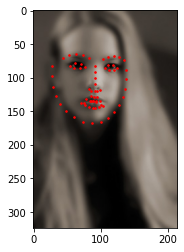

1 (500, 333, 3) (68, 2)


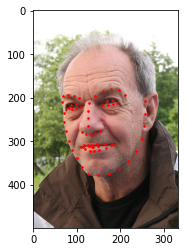

2 (250, 258, 3) (68, 2)


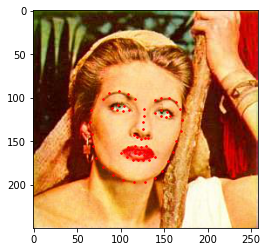

3 (434, 290, 3) (68, 2)


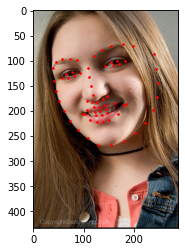

In [ ]:
#face...datase클래스의 인스턴스 생성, 얼굴 랜드마크에 대한 주석이 포함된 csv 파일의 경로와 이미지 디렉토리 전달
#데이터 세트 반복하며 인덱스, 모양, 랜드마크 인쇄
#show_landmarks사용하여 랜드마크가 오버레이된 이미지 표시
#4번 뽑고 종료
face_dataset = FaceLandmarksDataset(csv_file=data_dir + '/face_landmarks.csv',
                                    root_dir=data_dir)

for i, sample in enumerate(face_dataset):
    print(i, sample['image'].shape, sample['landmarks'].shape)
    show_landmarks(sample['image'], sample['landmarks'])

    if i == 3:
        break

이 데이터셋에 속한 이미지들은 크기가 균일하지 않다. 따라서 이미지들을 동일한 크기로 resize해야 한다. 이때 이미지의 크기가 변경되면 랜드마크 포인트들의 좌표도 따라서 변경되어야 한다. 이런 일을 수행하는 custom transform을 정의한다. 

In [ ]:
#샘플의 이미지 크기를 지정된 크기로 조정하는 resacle 클래스 정의
#원하는 출력 크기는 튜플로 생성자에 전달 
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple): Desired output size. 
    """

    def __init__(self, output_size):
        self.output_size = output_size
    #call 메소드가 샘플에서 호출되면 PIL image 모듈의 resize 메소드 사용하여 이미지 크기를 조정하고 다시 numpy 배열로 변환
    #이미지의 원래 치수와 새 치수 사용하여 크기 조정, call 매서드는 크기가 조정된 이미지와 랜드마크가 있는 사전을 반환
    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        img = Image.fromarray(image)
        img = img.resize((new_h, new_w), resample=0)
        img = np.array(img)

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w/w, new_h/h]   # element-wise product with broadcasting

        return {'image': img, 'landmarks': landmarks}

In [ ]:
#입력 이미지를 지정된 출력 크기로 무작위로 자르고 그에 따라 랜드마크 좌표를 조정하는 변환
#randomcrop 클래스는 자른 이미지의 원하는 출력 크기를 지정하는 output_size 인수 사용
class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple): Desired output size. 
    """

    def __init__(self, output_size):
        self.output_size = output_size
    #call 매소드는 이미지와 랜드마크 추출하여 이미지의 높이와 너비 계산, 원하는 크기와 비교하여 이미지가 자르기에 충분한지 확인
    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        assert h >= new_h and w >= new_w
        #이미지가 자르기에 충반하면 무작위로 생성, 그 다음 numpy array slice 사용해 이미지 자름
        
        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)
        #크롭의 상단 왼쪽 좌표를 빼서 랜드마크 좌표 조정
        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}
        #변환된 샘플은 자른 이미지와 조정된 랜드마크 좌표를 포함하는 사전으로 반환

정의한 `Rescale`과 `RandomCrop` 변환을 간단히 테스트해보자.

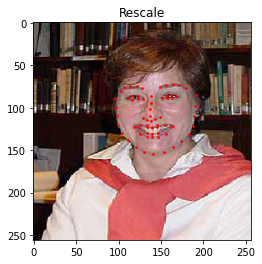

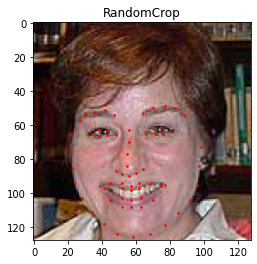

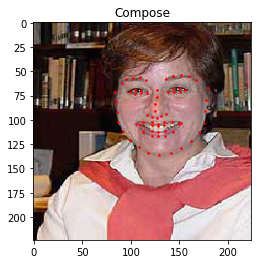

In [ ]:
#face...datset의 동일한 샘플에 세 가지 다른 변환 적용
#첫번째 변환 원하는 출력 크키로 조정하는 rescale
scale = Rescale((256, 256))
#두번째 변환 crop으로 이미지 원ㄴ하는 출력 크기로 무작위로 자름, 해당 랜드마크 좌표는 자른 이미지내에서 랜드마크 새 위치 반영하도록 그에 따라 조정
crop = RandomCrop((128, 128))
#세번째 변환 resacle,randomcrop 구성, 먼저 256으로 크기 조정, 그 다음 무작위로 224로 자름. 해당 랜드마크 좌표는 자른 이미지 내에서 랜드마크 새 위치 반영하도록 그에 따라 조정
composed = transforms.Compose([Rescale((256, 256)),
                               RandomCrop((224, 224))])
#각 변환에 대해 코드는 결과 이미지와 랜드마크 좌표 표시, 각 디스플레이의 제목은 적용된 변환의 이름을 나타냄
# Apply each of the above transforms on sample.
sample = face_dataset[66]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)
    plt.title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)


추가로 numpy 배열 형태의 이미지를 Tensor로 변환하고 정규화하는 MyToTensor를 작성해보자.

In [ ]:
#MyToTensor클래스는 샘플의 ndarray 이미지와 랜드마크를 tensor로 변환하는 사용자 지정 변환
class MyToTensor(object):
    """Convert ndarrays in sample to Tensors."""
    def __init__(self):
        self.img_tensorfier = transforms.Compose([
                       transforms.ToTensor(), 
                       #이미지 픽셀값은 색상
                       #normalize 이용해 이미지 픽셀 값을 평균 0.5, 표준편차 0.5로 정규화. 
                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ])
    #call 메소드 호출하여 샘플에 적용
    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
        image = self.img_tensorfier(image)
        return {'image': image,
                'landmarks': torch.from_numpy(landmarks)}

In [ ]:
#샘플에 변환이 적용된 face...dataset 인스턴스를 생성, 256으로 조정 224로 자르고 이미지와 랜드마크 pytorch tensor로 변환
transformed_dataset = FaceLandmarksDataset(csv_file=data_dir + '/face_landmarks.csv',
                                           root_dir=data_dir,
                                           transform=transforms.Compose([
                                               Rescale((256, 256)),
                                               RandomCrop((224, 224)),
                                               MyToTensor()
                                           ]))
#변환된 데이터 세트를 반복하고 각 샘플의 이미지 및 랜드마크 텐서의 크기와 이미지 텐서의 최소 및 최대 픽섹값을 출력
#데모용으로 처음 네 개의 샘플만 반복하지만 실제론 모든 샘플 반복
for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())
    print(sample['image'].min(), sample['image'].max())

    if i == 3:
        break

0 torch.Size([3, 224, 224]) torch.Size([68, 2])
tensor(-1.) tensor(0.5765)
1 torch.Size([3, 224, 224]) torch.Size([68, 2])
tensor(-1.) tensor(1.)
2 torch.Size([3, 224, 224]) torch.Size([68, 2])
tensor(-1.) tensor(1.)
3 torch.Size([3, 224, 224]) torch.Size([68, 2])
tensor(-1.) tensor(1.)


데이터로더를 생성하고 샘플 데이터 배치를 추출하여 디스플레이해보자.

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])


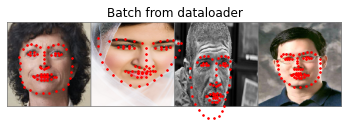

In [ ]:
#이전에 생성한 변환된 데이터 세트에 대한 pytorch dataloader 객체를 정의
#이 dataloader 개체는 데이터를 일괄적으로 로드하는데 사용
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)

#샘플 배치를 가져와 랜드마크와 함께 표시하는 도우미 함수 batch 정의
# Helper function to show a 
# 데이터로더에서 가져온 샘플 배치를 sampel_batched 변수에 할당
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    #각각 샘플 배치의 이미지와 랜드마크를 할당
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    #images_batch의 첫번째 크기를 할당 - 현재 배치에 있는 이미지 개수
    batch_size = len(images_batch)
    #images_vatch의 세번째 차원 크기 할당 - 현재 이미지의 크기
    im_size = images_batch.size(2)
    #이미지 그리드를 생성하는 pytorch 유틸리티 함수, 여러개의 이미지를 그리드 형태로 출력
    #이미지 텐서 입력받아 모든 이미지를 하나의 이미지 그리드로 결합, 여백 및 라인 간격 지정
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    grid = grid / 2 + 0.5 
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
                    landmarks_batch[i, :, 1].numpy() + grid_border_size,
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

#dataloader를 통해 반복하고 show_landmarks_batch 함수  사용하여 4번째 배치 표시
#enumerate 함수는 배치 인덱스를 추적하는데 사용
#4번째 배치가 표시되면 break 키워드 사용하여 루프 중지
for i_batch, sample_batched in enumerate(dataloader):
  #i_batch 현재 배치의 인덱스
  #sample_batched 현재 배치에 대한 샘플과 랜드마크 데이터를 담고 있는 딕셔너리
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        #축 보이지 않게 설정
        plt.axis('off')
        #대화형 모드 끔
        plt.ioff()
        #그림을 화면에 표시
        plt.show()
        break